In [3]:
from keras.datasets import boston_housing
import numpy as np
from keras import layers
from keras import models
import matplotlib.pyplot as plt

In [4]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [5]:
train_targets.shape

(404,)

In [6]:
train_data.shape

(404, 13)

In [7]:
test_data.shape

(102, 13)

In [13]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [29]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [6]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)    #Normalize data 
train_data /= std

test_data -= mean
test_data /= std

In [7]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) # no activaton func becouse we want can get any value
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # mse = mean square error, mae = mean absolute error
    return model

In [8]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples] # algoritm k validation
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
    axis=0)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [9]:
model = build_model()
model.fit(partial_train_data, partial_train_targets,
         epochs=num_epochs, batch_size=1, verbose=0)    # verbose=0 means quiet mode

val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
all_scores.append(val_mae)

In [10]:
all_scores

[2.3492655754089355]

In [11]:
np.mean(all_scores) # this means I have 2.4k$ deviation,it's too much. I will try with 500 epochs 

2.3492655754089355

In [12]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('proccessing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    patial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    
model = build_model()
history = model.fit(partial_train_data, partial_train_targets,
                   validation_data=(val_data, val_targets),
                   epochs=num_epochs, batch_size=1, verbose=0)

mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

proccessing fold # 0
proccessing fold # 1
proccessing fold # 2
proccessing fold # 3


In [26]:
partial_train_data.shape


(303, 13)

In [27]:
partial_train_targets.shape

(303,)

In [13]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)] #Compute score of validation for epochs


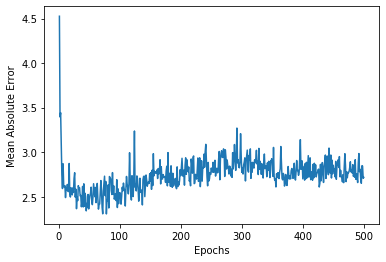

In [14]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.show()

In [15]:
# Good analyze this chart is impossible

In [16]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))  # Switch all points by exponential moving average
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])          # Skip 10 first chart points

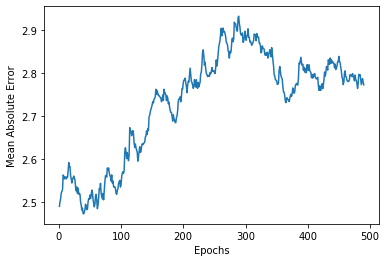

In [17]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.show()

In [18]:
# On chart I see after 60-80 epochs model is overfitted, I will try on less epochs but bigger batch

In [19]:
model = build_model()
model.fit(train_data, train_targets,           # This time i use whole train data
         epochs=80, batch_size=16, verbose=0)

In [20]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 15.3731 - mae: 2.7101


In [21]:
test_mae_score

2.710064649581909

In [22]:
# Finally at the end we have deviation by 2.4/2.6k $ on price 10k$ - 50k$